## Importing important libraries

In [173]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load data

In [174]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [175]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [176]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [177]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [178]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [179]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [180]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [181]:
print(customers_df.shape)
print(products_df.shape)
print(transactions_df.shape)

(200, 4)
(100, 4)
(1000, 7)


## Merge files

In [182]:
merged_df = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")

In [183]:
merged_df = pd.merge(merged_df, products_df, on="ProductID", how="left")

In [184]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [185]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [186]:
merged_df.to_csv("Merged_Data.csv", index=False)

## Basic pre-processing

In [187]:
merged_df.duplicated().sum()

0

In [188]:
merged_df = merged_df.drop(columns='Price_y')

In [189]:
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
merged_df["TransactionDate"] = pd.to_datetime(merged_df["TransactionDate"])

## EDA

In [190]:
# Extracting transanction month and Hour separately
merged_df["Month"] = merged_df["TransactionDate"].dt.month
merged_df["Hour"] = merged_df["TransactionDate"].dt.hour

In [191]:
merged_df = merged_df.drop(columns='TransactionDate')

In [192]:
merged_df

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Month,Hour
0,T00001,C0199,P067,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,8,12
1,T00112,C0146,P067,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,5,22
2,T00166,C0127,P067,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,4,7
3,T00272,C0087,P067,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,3,22
4,T00363,C0070,P067,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,10,8
996,T00759,C0059,P037,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,6,2
997,T00922,C0018,P037,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,4,13
998,T00959,C0115,P037,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,9,10


In [193]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  1000 non-null   object        
 1   CustomerID     1000 non-null   object        
 2   ProductID      1000 non-null   object        
 3   Quantity       1000 non-null   int64         
 4   TotalValue     1000 non-null   float64       
 5   Price_x        1000 non-null   float64       
 6   CustomerName   1000 non-null   object        
 7   Region         1000 non-null   object        
 8   SignupDate     1000 non-null   datetime64[ns]
 9   ProductName    1000 non-null   object        
 10  Category       1000 non-null   object        
 11  Month          1000 non-null   int32         
 12  Hour           1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(7)
memory usage: 93.9+ KB


## 1. Analyze Peak Seasons

In [194]:
# Group by Month
monthly_sales = merged_df.groupby("Month")["TotalValue"].sum().sort_values(ascending=False)

# Display peak months
print(monthly_sales)

Month
7     71366.39
9     70603.75
1     66376.39
5     64527.74
8     63436.74
12    62818.72
4     57519.06
2     51459.27
6     48771.18
3     47828.73
10    47063.22
11    38224.37
Name: TotalValue, dtype: float64


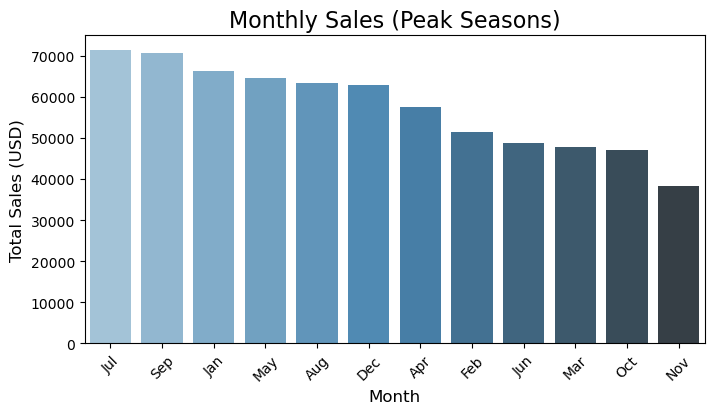

In [195]:
# Month names in order
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Reorder the months based on sorted values
sorted_month_names = [month_names[i-1] for i in monthly_sales.index]

# Plot the sorted sales
plt.figure(figsize=(8, 4))
sns.barplot(x=sorted_month_names, y=monthly_sales.values, palette="Blues_d")
plt.title("Monthly Sales (Peak Seasons)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [196]:
# Group by Hour
hourly_sales = merged_df.groupby("Hour")["TotalValue"].sum().sort_values(ascending=False)

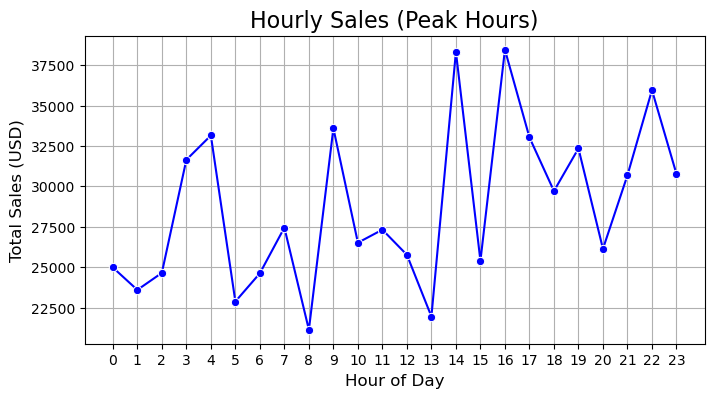

In [197]:
# Plot hourly sales
plt.figure(figsize=(8, 4))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o", color="b")
plt.title("Hourly Sales (Peak Hours)", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## 2. Product Performance Analysis

In [198]:
top_products = merged_df.groupby("ProductID")["TotalValue"].sum().sort_values(ascending=False)

In [199]:
# Merge back product names for interpretation
top_products = pd.merge(top_products, products_df[["ProductID", "ProductName","Category","Price"]], on="ProductID")

In [200]:
top_products.head(10)

,ProductID,TotalValue,ProductName,Category,Price
0,P029,19513.80,TechPro Headphones,Electronics,433.64
1,P079,17946.91,ActiveWear Rug,Home Decor,417.37
2,P048,17905.20,TechPro Cookbook,Books,416.40
3,P020,15060.92,ActiveWear Jacket,Clothing,396.34
4,P062,14592.24,HomeSense Novel,Books,374.16
5,P059,13947.20,SoundWave Jeans,Clothing,303.20
6,P039,13778.88,TechPro Smartwatch,Electronics,430.59
7,P083,13671.60,ActiveWear Smartwatch,Electronics,455.72
8,P019,13487.95,ComfortLiving Sweater,Clothing,385.37
9,P041,13232.12,ComfortLiving Smartphone,Electronics,456.28


In [201]:
merged_df['Category'].value_counts()

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

In [202]:
top_product_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

In [203]:
top_product_category

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

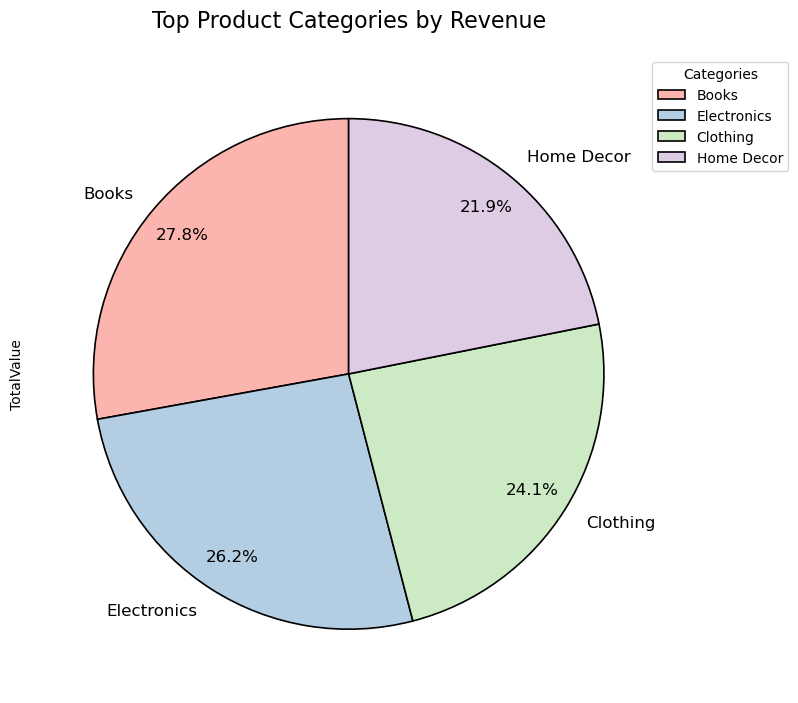

In [204]:
plt.figure(figsize=(8, 8))  # Adjust figure size
colors = plt.cm.Pastel1(range(len(top_product_category)))  # Custom color map

top_product_category.plot(
    kind="pie",
    autopct="%1.1f%%",      # Display percentages
    startangle=90,          # Rotate to start at the top
    colors=colors,          # Add a color palette
    wedgeprops={"edgecolor": "black", "linewidth": 1.2},  # Add borders to wedges
    pctdistance=0.85,       # Distance of percentage labels from the center
    textprops={"fontsize": 12},  # Adjust font size of text
)

# Add a central circle to give a "donut" effect
# plt.gca().add_artist(plt.Circle((0, 0), 0.70, color="white"))

# Add title and legend
plt.title("Top Product Categories by Revenue", fontsize=16, pad=20)
plt.legend(top_product_category.index, bbox_to_anchor=(1.2, 1.0), fontsize=10, title="Categories")

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## 3. High-Value Customers

In [205]:
# Top customers by spending
top_customers = merged_df.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False)

In [206]:
# Merge back customer names for interpretation
top_customers = pd.merge(top_customers, customers_df[["CustomerID", "CustomerName",'Region']], on="CustomerID")

In [207]:
top_customers.head(10)

,CustomerID,TotalValue,CustomerName,Region
0,C0141,10673.87,Paul Parsons,Europe
1,C0054,8040.39,Bruce Rhodes,Asia
2,C0065,7663.70,Gerald Hines,North America
3,C0156,7634.45,William Adams,North America
4,C0082,7572.91,Aimee Taylor,South America
5,C0188,7111.32,Anna Ball,South America
6,C0059,7073.28,Mrs. Kimberly Wright,North America
7,C0028,6819.57,Jennifer Pena,Asia
8,C0099,6715.72,Rodney Eaton,South America
9,C0165,6708.10,Juan Mcdaniel,South America


## 4. Customer Segmentation by Region

In [208]:
top_regions = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)

In [209]:
top_regions

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

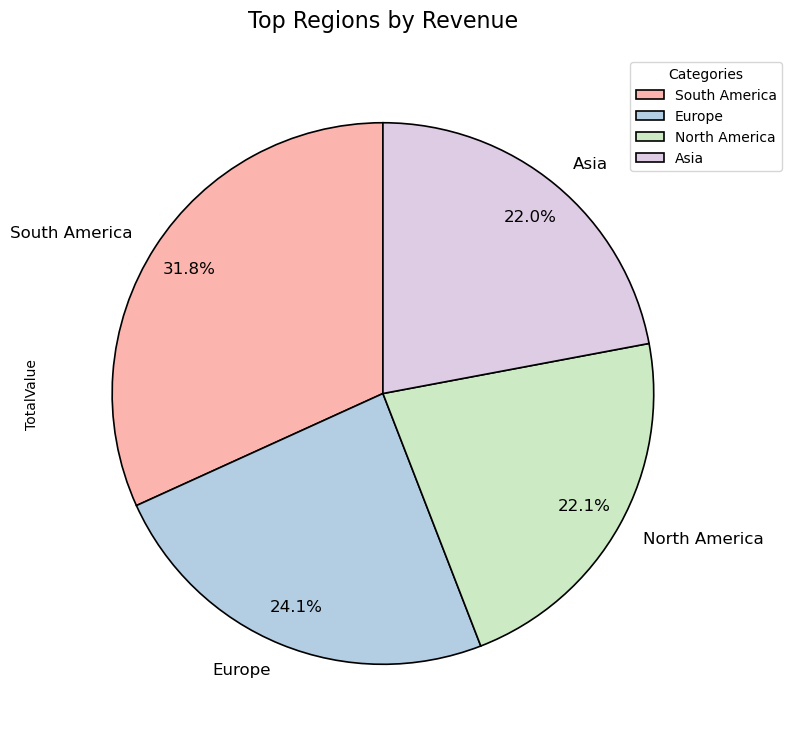

In [210]:
plt.figure(figsize=(8, 8))  # Adjust figure size
colors = plt.cm.Pastel1(range(len(top_regions)))  # Custom color map

top_regions.plot(
    kind="pie",
    autopct="%1.1f%%",      # Display percentages
    startangle=90,          # Rotate to start at the top
    colors=colors,          # Add a color palette
    wedgeprops={"edgecolor": "black", "linewidth": 1.2},  # Add borders to wedges
    pctdistance=0.85,       # Distance of percentage labels from the center
    textprops={"fontsize": 12},  # Adjust font size of text
)

# Add title and legend
plt.title("Top Regions by Revenue", fontsize=16, pad=20)
plt.legend(top_regions.index, bbox_to_anchor=(1.1, 1.0), fontsize=10, title="Categories")

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [211]:
# Group by Region and ProductName, then calculate the total sales for each
region_product_sales = merged_df.groupby(["Region", "Category"])["TotalValue"].sum().reset_index()

# Sort within each region to get the top products
region_top_products = region_product_sales.sort_values(["Region", "TotalValue"], ascending=[True, False])

# Display the top products for each region
print(region_top_products)

           Region     Category  TotalValue
1            Asia     Clothing    49353.09
2            Asia  Electronics    35658.15
3            Asia   Home Decor    33944.70
0            Asia        Books    33119.03
4          Europe        Books    47464.42
6          Europe  Electronics    41562.60
7          Europe   Home Decor    40892.02
5          Europe     Clothing    36335.59
10  North America  Electronics    44716.43
8   North America        Books    41811.99
9   North America     Clothing    38038.49
11  North America   Home Decor    27746.49
12  South America        Books    69752.03
14  South America  Electronics    58846.32
15  South America   Home Decor    48310.72
13  South America     Clothing    42443.49


In [212]:
top_n = 1
region_top_n_products = region_top_products.groupby("Region").head(top_n)

print("\nTop Products Region-Wise:")
print(region_top_n_products)


Top Products Region-Wise:
           Region     Category  TotalValue
1            Asia     Clothing    49353.09
4          Europe        Books    47464.42
10  North America  Electronics    44716.43
12  South America        Books    69752.03


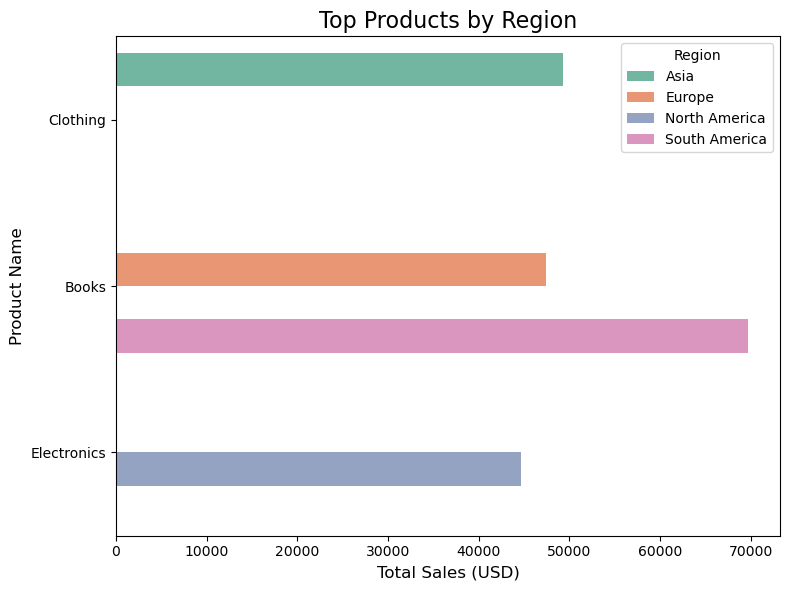

In [213]:
# Plot region-wise top products
plt.figure(figsize=(8, 6))
sns.barplot(
    x="TotalValue", 
    y="Category", 
    hue="Region", 
    data=region_top_n_products, 
    palette="Set2"
)
plt.title("Top Products by Region", fontsize=16)
plt.xlabel("Total Sales (USD)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

## 5. Customer Churn Analysis

In [214]:
# Identify customers with no transactions
customers_with_transactions = merged_df["CustomerID"].unique()
all_customers = customers_df["CustomerID"].unique()

# Customers who signed up but have not made any transactions
no_transaction_customers = set(all_customers) - set(customers_with_transactions)

# Create a DataFrame for these customers
no_transaction_df = customers_df[customers_df["CustomerID"].isin(no_transaction_customers)]
print("Customers with no transactions:")
print(no_transaction_df)

# Identify customers who haven't made repeat purchases
# Count the number of transactions per customer
customer_transaction_count = merged_df.groupby("CustomerID")["TransactionID"].count().reset_index()
customer_transaction_count.rename(columns={"TransactionID": "TransactionCount"}, inplace=True)

# Merge this information with the customers DataFrame
customer_analysis = pd.merge(customers_df, customer_transaction_count, on="CustomerID", how="left")

# Replace NaN values in TransactionCount with 0 for customers with no transactions
customer_analysis["TransactionCount"] = customer_analysis["TransactionCount"].fillna(0)

# Define "repeat purchase" customers as those with more than 1 transaction
customer_analysis["RepeatPurchase"] = customer_analysis["TransactionCount"] > 1

# Identify churned customers (no transactions or no repeat purchases)
customer_analysis["Churned"] = (customer_analysis["TransactionCount"] == 0) | (~customer_analysis["RepeatPurchase"])

# Display churned customers
churned_customers = customer_analysis[customer_analysis["Churned"]]
print("Churned Customers:")
print(churned_customers[["CustomerID", "CustomerName", "SignupDate", "TransactionCount", "Churned"]])

Customers with no transactions:
    CustomerID   CustomerName Region  SignupDate
179      C0180  Amy Carpenter   Asia  2023-10-25
Churned Customers:
    CustomerID       CustomerName  SignupDate  TransactionCount  Churned
13       C0014     Deborah Wilcox  2024-06-22               1.0     True
19       C0020  Mr. Manuel Conway  2024-06-11               1.0     True
32       C0033         Tyler Holt  2024-08-04               1.0     True
57       C0058     Zachary Turner  2024-01-28               1.0     True
59       C0060       James Murphy  2022-04-22               1.0     True
77       C0078       Julia Palmer  2024-11-13               1.0     True
79       C0080     David Gonzalez  2024-02-07               1.0     True
96       C0097          Tina Ford  2023-12-18               1.0     True
109      C0110    Elizabeth Wells  2024-09-21               1.0     True
129      C0130       Robert Jones  2023-04-19               1.0     True
149      C0150    Angela Williams  2022-09-13   